In [74]:
import sys
sys.path.append('../run_analyses/')

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
import numpy as np
import pandas as pd

from scipy.optimize import root
import scipy

from support.charting import primaryColors, fullColors, save_fig
from support.load     import loadAllData, methodParams
from support.util     import titles, order, methodTitle, modelTitle

from modelConfig      import models
from util.util        import getLeverNames

from ema_workbench.analysis import parcoords

from IPython.core import display as ICD

In [6]:
sns.set_style('white')

# SMALL EPSILON VALUES

In [47]:
model = 'dps'
method = 'mordm'
root = '../data_smalleps'
runs = 5
nfe = 5000

In [48]:
archive_small = pd.read_csv(root + '/' + method + '/optimize/archives_' + model + 
           '_NSGAIIHybrid_runs' + str(runs) + '_nfe' + str(nfe) + '_scenarios10000' + '_refScenario-1' + '.csv', index_col=0)
convergence_small = pd.read_csv(root + '/' + method + '/optimize/convergences_' + model + 
           '_NSGAIIHybrid_runs' + str(runs) + '_nfe' + str(nfe) + '_scenarios10000' + '_refScenario-1' + '.csv', index_col=0)
nondominated_small = pd.read_csv(root + '/' + method + '/optimize/nondominated_' + model + 
           '_NSGAIIHybrid_runs' + str(runs) + '_nfe' + str(nfe) + '_scenarios10000' + '_refScenario-1' + '.csv')

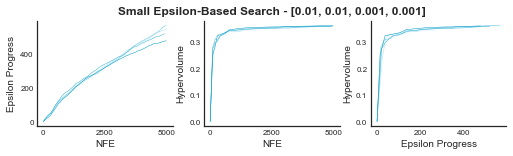

In [20]:
xs = ['nfe','nfe','epsilon_progress']
ys = ['epsilon_progress','hypervolume','hypervolume']

xax = ['NFE','NFE','Epsilon Progress']
yax = ['Epsilon Progress','Hypervolume','Hypervolume']

modelIdx = 'dps'

f = plt.figure(figsize=(7.5, 5.5))

gs0 = gridspec.GridSpec(3, 2, width_ratios=[0.25, 20])

for methodIdx, method in enumerate(['mordm']): 
    gs00 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[methodIdx*2+1])
    for plotIdx in range(len(xs)): 
        ax = plt.Subplot(f, gs00[0, plotIdx])
        f.add_subplot(ax)

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_xlabel(xax[plotIdx])
        ax.set_ylabel(yax[plotIdx])

        if plotIdx == 1: 
            ax.set_title('Small Epsilon-Based Search - [0.01, 0.01, 0.001, 0.001]', fontsize=12, weight='bold')

        convs = [convergence_small]
        runs = len(convs[0]['run_index'].unique())
        if len(convs) == 1:
            palettes = [sns.light_palette(primaryColors[model][method],n_colors=runs)]
        else:
            palettes = [[elem] * runs for elem in fullColors[model][method]]

        grouped = []
        for idx, elem in enumerate(convs):
            grouped.append(elem.groupby(['run_index']))

        for groupIdx, conv in enumerate(grouped): 
            for name, group in conv:
                ax.plot(group[xs[plotIdx]],group[ys[plotIdx]],color=palettes[groupIdx][name], linewidth=0.5)

        nfe = 5000
        if plotIdx < 2: 
            ax.set_xticks([0,nfe/2,nfe])

        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(8)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(8) 
plt.tight_layout(pad=0.5, w_pad=2.5)
save_fig(f, 'images/appendix/', 'smalleps_convergence_' + model)
plt.show()

# LARGE EPSILON VALUES

In [34]:
model = 'dps'
method = 'mordm'
root = '../data'
runs = 50
nfe = 100000

In [37]:
archive_big = pd.read_csv(root + '/' + method + '/optimize/archives_' + model + 
           '_NSGAIIHybrid_runs' + str(runs) + '_nfe' + str(nfe) + '_scenarios10000' + '_refScenario-1' + '.csv', index_col=0)
convergence_big = pd.read_csv(root + '/' + method + '/optimize/convergences_' + model + 
           '_NSGAIIHybrid_runs' + str(runs) + '_nfe' + str(nfe) + '_scenarios10000' + '_refScenario-1' + '.csv', index_col=0)
nondominated_big = pd.read_csv(root + '/' + method + '/optimize/nondominated_' + model + 
           '_NSGAIIHybrid_runs' + str(runs) + '_nfe' + str(nfe) + '_scenarios10000' + '_refScenario-1' + '.csv')

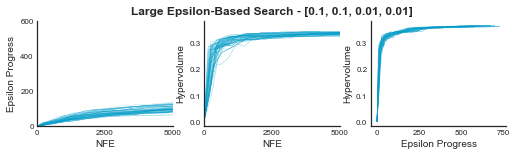

In [19]:
xs = ['nfe','nfe','epsilon_progress']
ys = ['epsilon_progress','hypervolume','hypervolume']

xax = ['NFE','NFE','Epsilon Progress']
yax = ['Epsilon Progress','Hypervolume','Hypervolume']

modelIdx = 'dps'

f = plt.figure(figsize=(7.5, 5.5))

gs0 = gridspec.GridSpec(3, 2, width_ratios=[0.25, 20])

for methodIdx, method in enumerate(['mordm']): 
    gs00 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[methodIdx*2+1])
    for plotIdx in range(len(xs)): 
        ax = plt.Subplot(f, gs00[0, plotIdx])
        f.add_subplot(ax)

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_xlabel(xax[plotIdx])
        ax.set_ylabel(yax[plotIdx])

        if plotIdx == 1: 
            ax.set_title('Large Epsilon-Based Search - [0.1, 0.1, 0.01, 0.01]', fontsize=12, weight='bold')

        convs = [convergence_big]
        runs = len(convs[0]['run_index'].unique())
        if len(convs) == 1:
            palettes = [sns.light_palette(primaryColors[model][method],n_colors=runs)]
        else:
            palettes = [[elem] * runs for elem in fullColors[model][method]]

        grouped = []
        for idx, elem in enumerate(convs):
            grouped.append(elem.groupby(['run_index']))

        for groupIdx, conv in enumerate(grouped): 
            for name, group in conv:
                ax.plot(group[xs[plotIdx]],group[ys[plotIdx]],color=palettes[groupIdx][name], linewidth=0.5)

        nfe = 5000
        if plotIdx < 2: 
            ax.set_xlim(0,5000)
            ax.set_xticks([0,nfe/2,nfe])
        if plotIdx == 0: 
            ax.set_ylim(0,600)

        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(8)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(8) 
plt.tight_layout(pad=0.5, w_pad=2.5)
save_fig(f, 'images/appendix/', 'bigeps_convergence_' + model)
plt.show()

# Lever Comparison of Nondominated Sets

In [51]:
levers = getLeverNames(models[model])
leverVals = []
for lever in levers: 
    leverVal = nondominated_big[lever]
    df = pd.DataFrame(leverVal)
    df.columns = ['value']
    df['method'] = method
    df['lever'] = lever
    df['epsilon'] = 'Big'
    leverVals.append(df)

for lever in levers: 
    leverVal = nondominated_small[lever]
    df = pd.DataFrame(leverVal)
    df.columns = ['value']
    df['method'] = method
    df['lever'] = lever
    df['epsilon'] = 'Small'
    leverVals.append(df)

df = pd.concat(leverVals)

In [67]:
def showLeverRanges(model, df):
    pal = {'Big': '#009ac6','Small': '#66c2dc'}
    for tp in ['box','violin']: 
        g = sns.factorplot(x="epsilon", y="value", col="lever", palette=pal,
                           data=df, kind=tp,
                           size=4, aspect=.7)
        g.set_axis_labels('', "Value").set_titles("{col_name}").set_xticklabels(['Big Epsilons','Small Epsilons'])

        plt.suptitle('Decision Lever Ranges for ' + modelTitle[model].replace('\n',' ') + ' + ' + methodTitle['mordm'] + ' Analysis', fontsize=14,weight='bold',y=1.1)
        
        save_fig(g, 'images/appendix/', 'leverranges_epsilons_' + tp)
        
        plt.show()

    return g

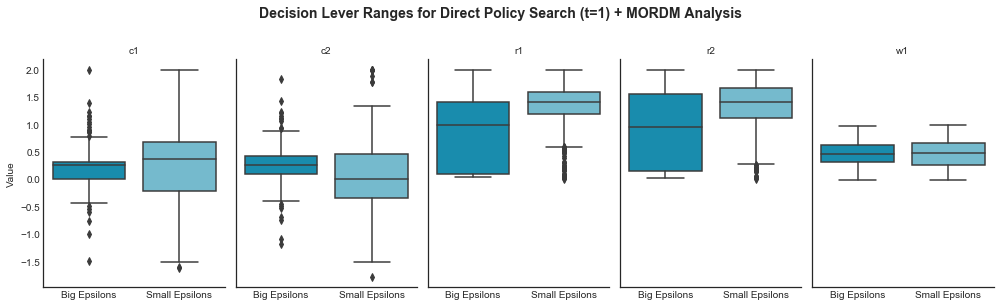

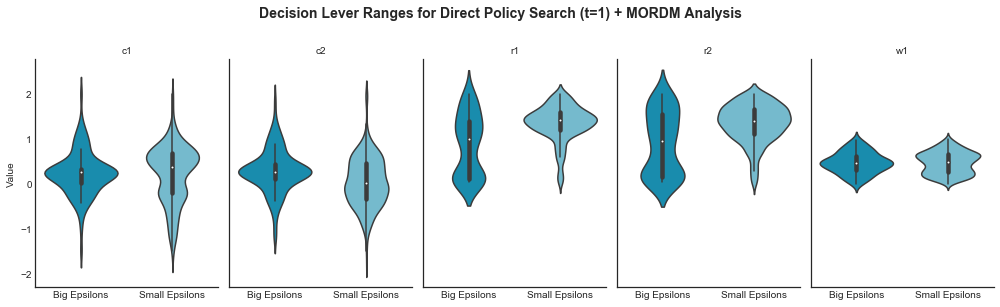

In [68]:
showLeverRanges('dps', df)

# SIMILARITY

In [71]:
# Data Prep
normalRanges = {
    'dps': pd.DataFrame({'c1':[-2,2],'c2':[-2,2],'r1':[0,2],'r2':[0,2],'w1':[0,1]}),
}
for name, rg in normalRanges.items(): 
    rg = rg.append(rg.diff(periods=1, axis=0).iloc[1])
    rg.index = ['min','max','diff']
    normalRanges[name] = rg

nondFrames = {'big':{},'small':{}}
normalFrames = {'big':{},'small':{}}

model='dps'
for size, nondominateArray in {'big':nondominated_big,'small':nondominated_small}.items(): 
        leverNames = getLeverNames(models['dps'])

        if not isinstance(nondominateArray, list): 
            nondominateArray = [nondominateArray]
        for idx, nond in enumerate(nondominateArray): 
            if len(nondominateArray) > 1: 
                ref = 'Ref' + str(idx)
                if idx == len(nondominateArray) - 1: 
                    ref = 'Base'
                nond['id'] = ref + ':' + nond.index.map(str)
                nond.index = nond['id']
                nond.index.name = ''
        
        nondFrame = pd.concat(nondominateArray)
        
        nondFrames[size] = nondFrame[leverNames]
        normalFrames[size] = (nondFrames[size] - normalRanges[model].loc['min',:])/normalRanges[model].loc['diff',:]

In [75]:
distances = {'big':{},'small':{}}
distData = []

for size in ['big','small']: 
        normal = scipy.spatial.distance.cdist(normalFrames[size], normalFrames[size], metric='euclidean')
        distances[size] = pd.DataFrame(normal,columns=nondFrames[size].index,index=nondFrames[size].index)
        
        corr = distances[size].values
        mask = np.zeros_like(corr, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mx = np.ma.masked_array(corr, mask=mask).flatten()
        
        df = pd.DataFrame({'distance':mx})
        df['model'] = model
        df['size'] = size
        df['hue'] = df['model'] + '.' + df['size']
        distData.append(df.dropna(axis=0, how='any'))
        
distData = pd.concat(distData)

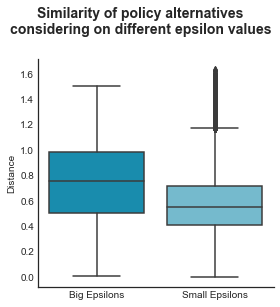

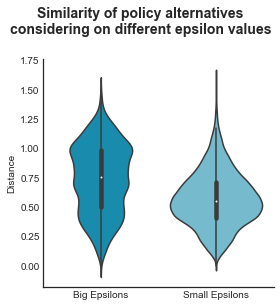

In [94]:
pal = {'big': '#009ac6','small': '#66c2dc'}
for tp in ['box','violin']: 
    g = sns.factorplot(x="size", y="distance", col="model", palette=pal,
                           data=distData, kind=tp)
    g.set_xticklabels(['Big Epsilons','Small Epsilons']).set_titles('').set_axis_labels('', "Distance")

    plt.suptitle('Similarity of policy alternatives\nconsidering on different epsilon values', fontsize=14,weight='bold',y=1.1)

    save_fig(g, 'images/appendix/', 'epsilons_similarity_' + tp)

    plt.show()


# ROBUSTNESS